# Assignment: Predicting car prices using regression


Objective:  Using Python, analyze and predict car prices based on given features by building regression
models. This assignment will enhance your skills in exploratory data analysis (EDA), data
preprocessing, and regression model development using libraries like Pandas, Matplotlib, and
Scikit-learn.

The dataset (car_prices.csv) includes the following columns:
• Price: The selling price of the car (target variable, in dollars).
• Year: The year of manufacture.
• Mileage: The total mileage of the car (in kilometers).
• Engine Size: The engine capacity (in liters).
• Fuel Type: The type of fuel used (e.g., Petrol, Diesel, Electric).
• Transmission: The type of transmission (e.g., Manual, Automatic).
• Brand: The car brand (e.g., Toyota, Honda
You can either download this dataset from Kaggle or create your own synthetic dataset using 
Python., BMW).

In [11]:
# Creating a synthetic dataset
import pandas as pd
import numpy as np

# Define parameters
num_samples = 1000
brands = ['Toyota', 'Honda', 'BMW', 'Ford', 'Mercedes', 'Audi', 'Chevrolet', 'Hyundai', 'Nissan', 'Volkswagen']
fuel_types = ['Petrol', 'Diesel', 'Electric', 'Hybrid']
transmissions = ['Manual', 'Automatic']

# Generate synthetic data
np.random.seed(42)
data = {
    'Price': np.random.randint(5000, 80000, num_samples),  # Car prices range from $5,000 to $80,000
    'Year': np.random.randint(2000, 2024, num_samples),  # Manufacturing years between 2000 and 2023
    'Mileage': np.random.randint(1000, 300000, num_samples),  # Mileage between 1,000 and 300,000 km
    'Engine Size': np.round(np.random.uniform(1.0, 6.0, num_samples), 1),  # Engine sizes from 1.0L to 6.0L
    'Fuel Type': np.random.choice(fuel_types, num_samples),
    'Transmission': np.random.choice(transmissions, num_samples),
    'Brand': np.random.choice(brands, num_samples)
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('car_prices.csv', index=False)

# Display first few rows
print(df.head())

   Price  Year  Mileage  Engine Size Fuel Type Transmission       Brand
0  20795  2002   175668          3.3    Petrol       Manual         BMW
1   5860  2009   232513          5.1    Diesel    Automatic         BMW
2  59886  2009   258368          1.3    Diesel       Manual  Volkswagen
3  11265  2018    87365          2.9    Petrol       Manual         BMW
4  42194  2013   231662          5.3  Electric    Automatic        Audi


## Task 1: Explore the dataset.1
3. Check for missing or null values2
4. Display summary statistics for all colums.

In [12]:
#Checking for missing or null values
print(df.isnull().sum())

#Displaying summary statistics for all columns
print(df.describe())

Price           0
Year            0
Mileage         0
Engine Size     0
Fuel Type       0
Transmission    0
Brand           0
dtype: int64
              Price         Year        Mileage  Engine Size
count   1000.000000  1000.000000    1000.000000   1000.00000
mean   41598.506000  2011.388000  148962.054000      3.56110
std    22124.638286     6.868671   84906.161378      1.42135
min     5055.000000  2000.000000    1781.000000      1.00000
25%    22341.000000  2005.000000   74628.250000      2.40000
50%    42139.500000  2011.000000  148192.500000      3.60000
75%    60663.500000  2017.000000  222226.750000      4.80000
max    79740.000000  2023.000000  299871.000000      6.00000


## Task 2: Visualize the Dataset
1. Plot a histogram for Price.
2. Create scatter plots for:    
o Price vs. Mileag    e
o Price vs. Engine Size
3. Create a bar chart showing the average price for each Brand.
4. Generate a correlation heatmap for numerical features

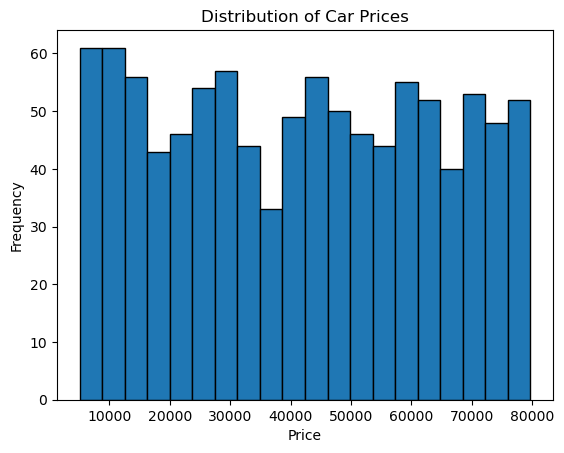

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

#Plot a histogram for price
plt.hist(df["Price"], bins=20, edgecolor='k')
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

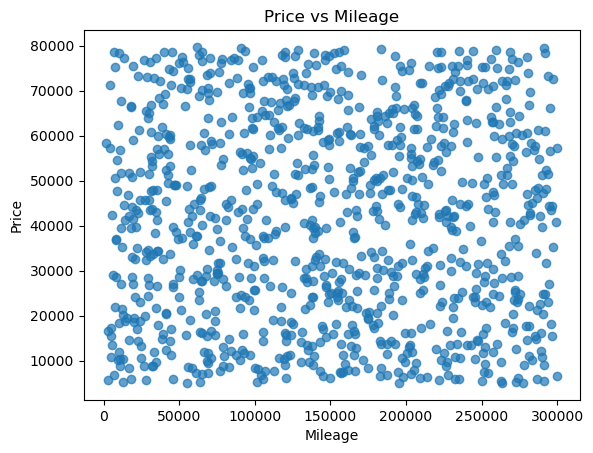

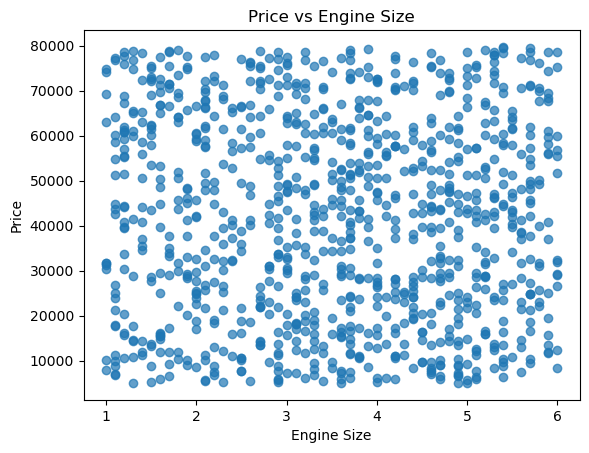

In [14]:
#Scatter plots

#Price vs mileage
plt.scatter(df["Mileage"],df["Price"],alpha=0.7)
plt.title('Price vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()
          
#price vs engine size
plt.scatter(df['Engine Size'], df['Price'], alpha=0.7)
plt.title("Price vs Engine Size")
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

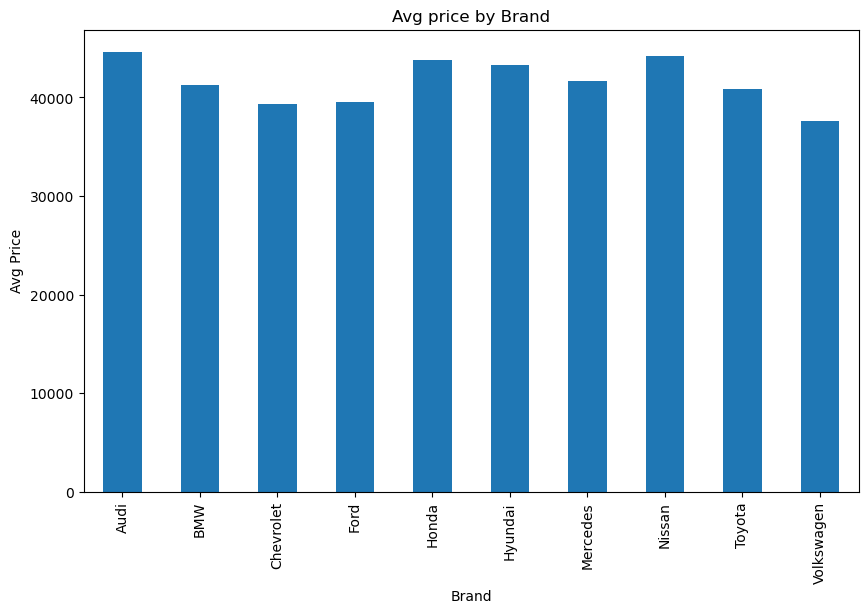

In [15]:
#Bar chart showing the average price for each Brand

#first find the average price for each brand
avg_price=df.groupby('Brand')['Price'].mean()
avg_price.plot(kind='bar', figsize=(10,6), title="Avg price by Brand")
plt.xlabel("Brand")
plt.ylabel("Avg Price")
plt.show()

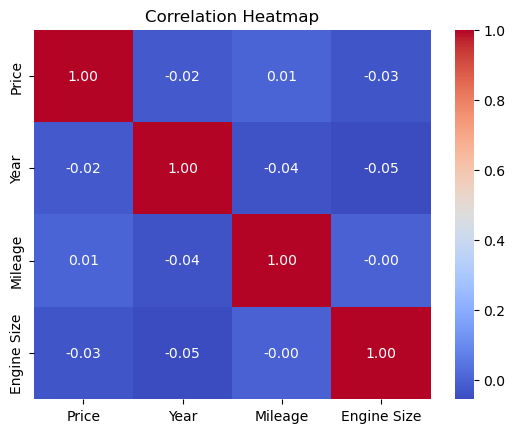

In [16]:
#Generate a correlation heatmap for numerical features
# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation = numerical_df.corr()

# Generate heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Task 3: Preprrocess the Data
Steps:
1. Handle missing values.
2. Encode categorical features (Fuel Type, Transmission, Brand) using one-hot encoding.
3. Normalize or scale numerical features (Mileage, Engine Size, Year).
4. Split the dataset into training and testing sets (80% training, 20% testing).

In [17]:
# As we saw earlierr, there is no missing data. move to next step

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=['Fuel Type', 'Transmission',
'Brand'], drop_first=True)

print(df_encoded.head(5))

   Price  Year  Mileage  Engine Size  Fuel Type_Electric  Fuel Type_Hybrid  \
0  20795  2002   175668          3.3               False             False   
1   5860  2009   232513          5.1               False             False   
2  59886  2009   258368          1.3               False             False   
3  11265  2018    87365          2.9               False             False   
4  42194  2013   231662          5.3                True             False   

   Fuel Type_Petrol  Transmission_Manual  Brand_BMW  Brand_Chevrolet  \
0              True                 True       True            False   
1             False                False       True            False   
2             False                 True      False            False   
3              True                 True       True            False   
4             False                False      False            False   

   Brand_Ford  Brand_Honda  Brand_Hyundai  Brand_Mercedes  Brand_Nissan  \
0       False        Fa

In [18]:
# Features and target
X = df_encoded.drop('Price', axis=1) #all features except price for x
y = df_encoded['Price']

# Normalize numerical features
scaler = StandardScaler()
X[['Mileage', 'Engine Size', 'Year']] = scaler.fit_transform(X[['Mileage',
'Engine Size', 'Year']])

In [19]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (800, 16)
Test set size: (200, 16)


## Task 4: Simple Linear Regression
1. Use Mileage as the only predictor.
2. Train a simple linear regression model.
3. Evaluate the model using:
o Mean Absolute Error (MAE)
o Mean Squared Error (MSE)
o Root Mean Squared Error (RMSE)
4. Visualize the regression line.

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Simple linear regression with Mileage
X_simple = X_train[['Mileage']]
X_test_simple = X_test[['Mileage']]
model_simple = LinearRegression()
model_simple.fit(X_simple, y_train)

# Predictions
y_pred_simple = model_simple.predict(X_test_simple)

# Evaluation
mae = mean_absolute_error(y_test, y_pred_simple)
mse = mean_squared_error(y_test, y_pred_simple)
rmse = np.sqrt(mse)
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")




MAE: 19712.86
MSE: 511562054.75
RMSE: 22617.74


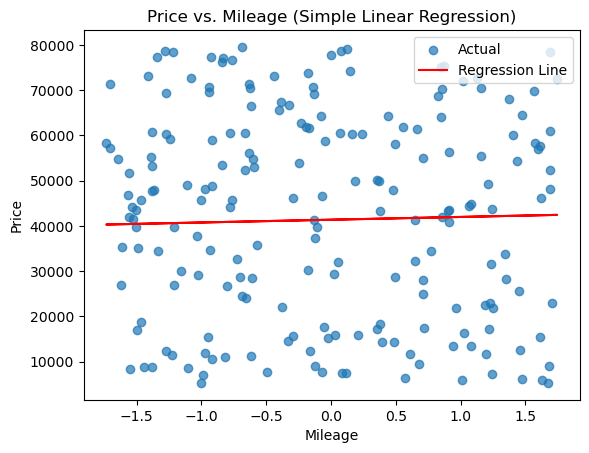

In [21]:
# Visualize regression line
plt.scatter(X_test_simple, y_test, alpha=0.7, label='Actual')
plt.plot(X_test_simple, y_pred_simple, color='red', label='Regression Line')
plt.title('Price vs. Mileage (Simple Linear Regression)')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.legend()
plt.show()

## Task 5: Multiple Regression
1. Use all features (numerical and encoded categorical).
2. Train a multiple linear regression model.
3. Evaluate the model using the same metrics.
4. Visualize actual vs. predicted prices.

In [22]:
# Multiple linear regression
model_multiple = LinearRegression()
model_multiple.fit(X_train, y_train)

# Predictions
y_pred_multiple = model_multiple.predict(X_test)

# Evaluation
mae_multiple = mean_absolute_error(y_test, y_pred_multiple)
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
rmse_multiple = np.sqrt(mse_multiple)
print(f"MAE: {mae_multiple:.2f}")
print(f"MSE: {mse_multiple:.2f}")
print(f"RMSE: {rmse_multiple:.2f}")

MAE: 19950.18
MSE: 528566191.26
RMSE: 22990.57


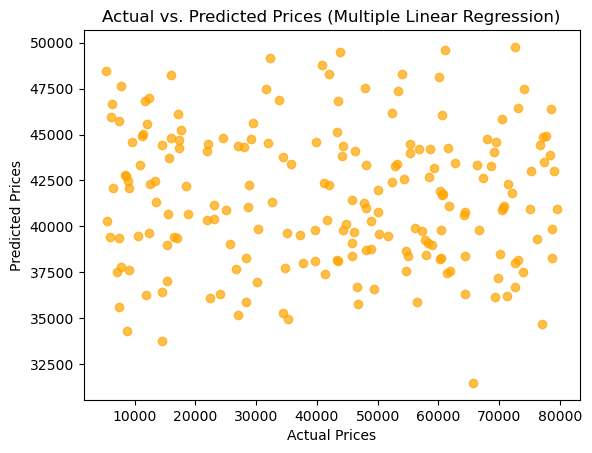

In [23]:
# Actual vs. Predicted Prices
plt.scatter(y_test, y_pred_multiple, alpha=0.7, color='orange')
plt.title('Actual vs. Predicted Prices (Multiple Linear Regression)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


It's worth it to note this data is fake/synthetically generated, which may be a reason for the lack of correlations (or unexpected results) between certain variables 
that we would usually expect in a real dataset. The main purpose of this activity was to strengthen knowlege of regression and the process/steps (from data cleaning to visualization to performing the regression and analyzing results)s.